In [35]:
import pickle
import numpy as np

def get_kl_data(final_path, agg_type, rand=False):
    with open(final_path, 'rb') as file:
        final_dict = pickle.load(file)
    kl_data = final_dict[agg_type][0]
    idx = final_dict["idx"][0]
    return kl_data

In [36]:
def get_losses(path):
    with open(path, 'rb') as file:
        losses = pickle.load(file)
    return losses
losses = get_losses("/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/loss.pkl")

In [37]:
path="/vol/aimspace/users/kaiserj/Individual_Privacy_Accounting/results_multi_model/kl_jax_torch_1000_remove_1000_dataset_cifar10compressed_model_Tinymodel_subset_50000_range_0_1000_corrupt_0.0_corrupt_data_0.0_0_mult_model.pkl"

kl_data = np.array(get_kl_data(path, "kl"))
print("")

In [38]:
from scipy.stats import spearmanr
# Loop over pairs of subsequent columns
results = []
for i in range(kl_data.shape[1] - 1):
    col1 = kl_data[:, i]
    col2 = kl_data[:, -1]
    
    # Compute Spearman rank correlation
    corr, _ = spearmanr(col1, col2)
    results.append(corr)
    
    # Print the result with informative strings
    print(f"Spearman rank correlation between epoch {i * 100} and epoch {(kl_data.shape[1] - 1) * 100}: {corr:.4f}")

Spearman rank correlation between epoch 0 and epoch 900: 0.1091
Spearman rank correlation between epoch 100 and epoch 900: 0.7539
Spearman rank correlation between epoch 200 and epoch 900: 0.8989
Spearman rank correlation between epoch 300 and epoch 900: 0.9505
Spearman rank correlation between epoch 400 and epoch 900: 0.9745
Spearman rank correlation between epoch 500 and epoch 900: 0.9872
Spearman rank correlation between epoch 600 and epoch 900: 0.9942
Spearman rank correlation between epoch 700 and epoch 900: 0.9978
Spearman rank correlation between epoch 800 and epoch 900: 0.9995


/tmp/ipykernel_1748266/4294575794.py:41: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=epochs, y=results, palette='viridis', hue=None, ax=ax1)


<Figure size 640x480 with 0 Axes>

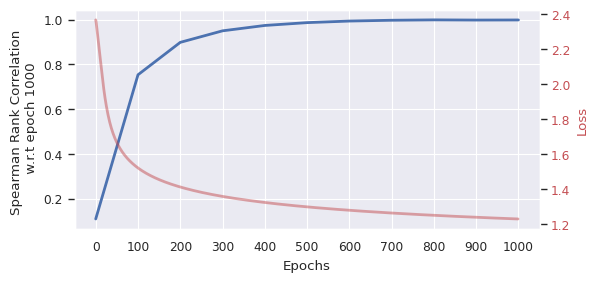

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data - replace this with your actual data
values = results  # Example values
results.append((results[-1] + results[-2])/2)
results.append((results[-1] + results[-2])/2)
epochs = [i * 100 for i in range(len(results))]   # Custom x-tick labels

# Set Seaborn theme with paper context and font scale 2
sns.set_theme(context="paper", font_scale=2)

# Remove spines on every figure
sns.despine()
cmap = "viridis"

# Set minimum linewidth to 2
sns.set_context("paper", rc={"lines.linewidth": 2})

# # Create a line plot
# plt.figure(figsize=(8, 3))
# sns.lineplot(x=epochs, y=values, palette='viridis', hue=None)

# # Set x-tick labels
# plt.xticks(ticks=epochs, labels=[str(epoch) for epoch in epochs])

# # Set titles and labels
# plt.title("Spearman Rank Correlation of LSI values between model at given epoch\n and final model (1000 epochs)", fontsize=12, pad=20)
# plt.xlabel("Epochs", fontsize=12)
# plt.ylabel("Spearman Rank Correlation", fontsize=12)

# # Show the plot
# plt.show()


# Create a line plot
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plot results on the left y-axis
sns.lineplot(x=epochs, y=results, palette='viridis', hue=None, ax=ax1)
ax1.set_xticks(epochs)
ax1.set_xticklabels([str(epoch) for epoch in epochs])
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Spearman Rank Correlation \n w.r.t epoch 1000")
# ax1.set_title("Spearman Rank Correlation of LSI values between model at given epoch\n and final model (1000 epochs)", fontsize=12, pad=20)

# Create a second y-axis for the losses
ax2 = ax1.twinx()
ax2.plot(range(1000), losses, 'r-', alpha=0.5)
ax2.set_ylabel("Loss", color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.grid(False)
# Show the plot
plt.subplots_adjust(bottom=0.15)
plt.savefig('multi_model_correlation.svg', format='svg', pad_inches=10)
plt.show()